IMPORTAR BLIBLIOTECAS

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import csv

CODIFICAÇÃO

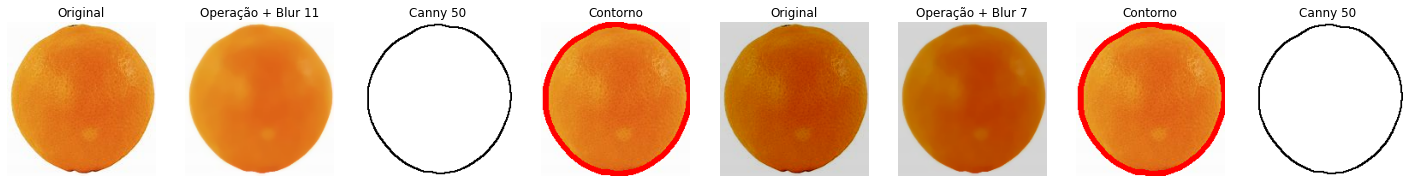

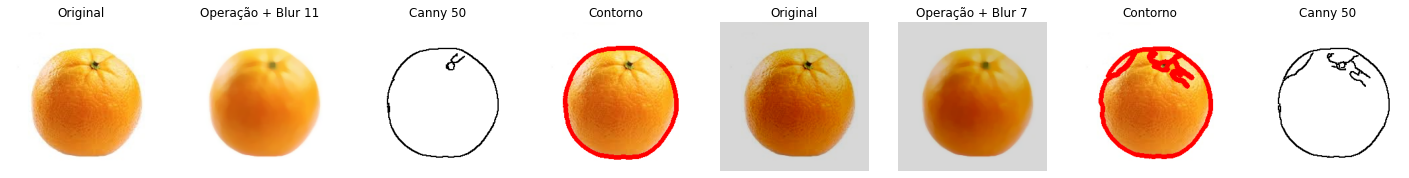

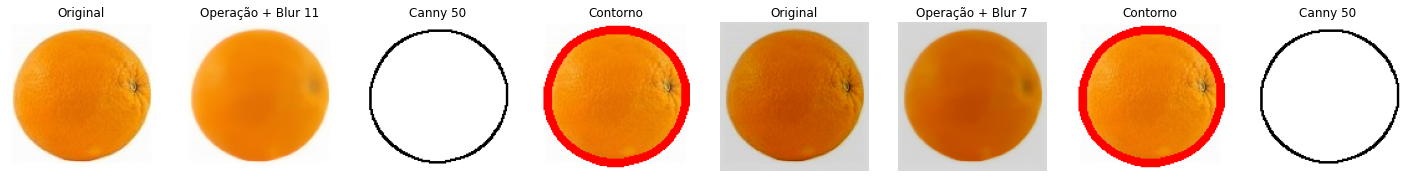

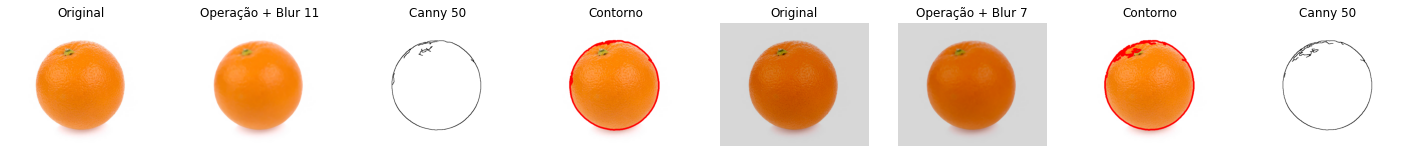

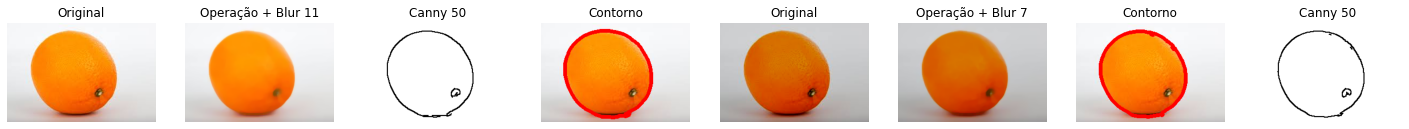

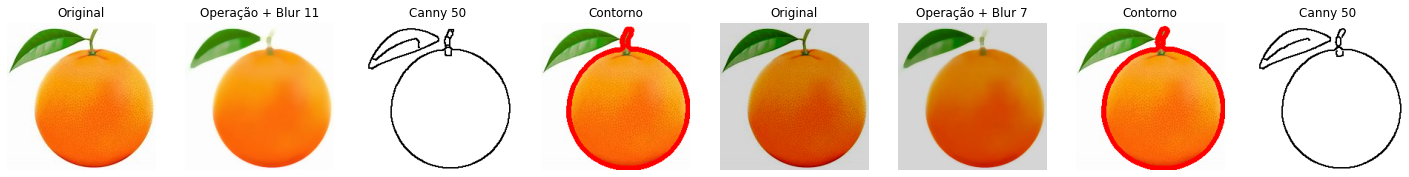

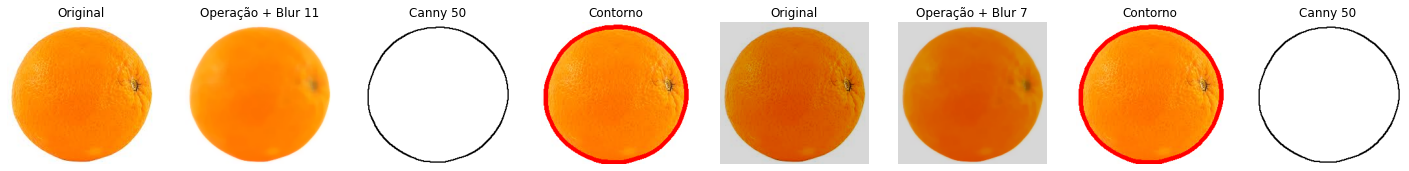

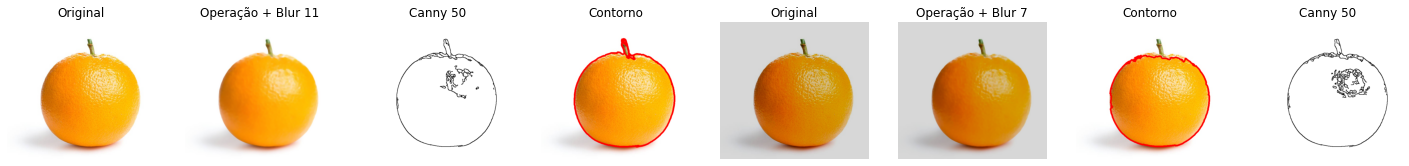

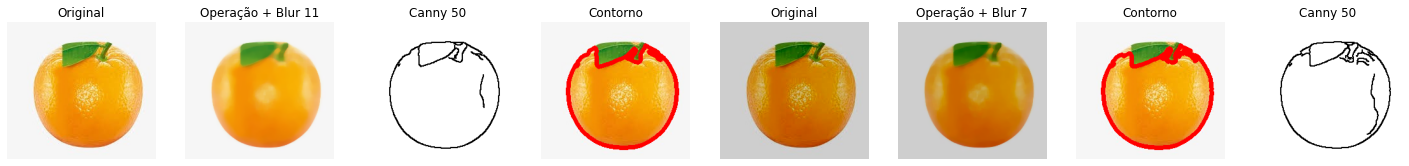

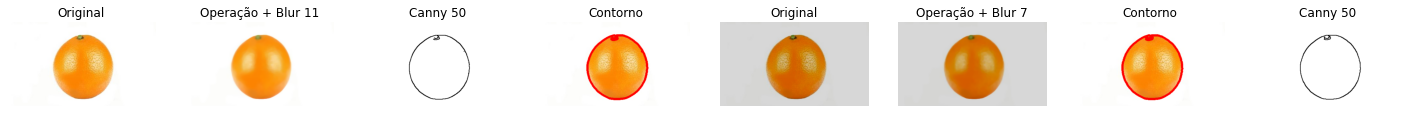

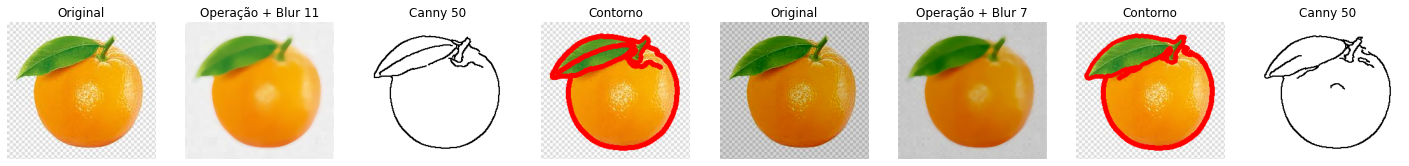

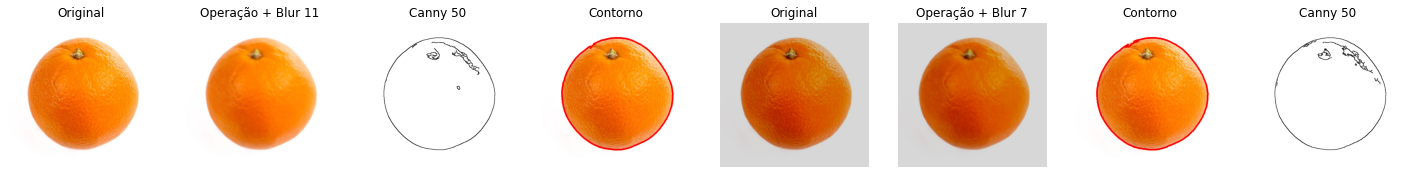

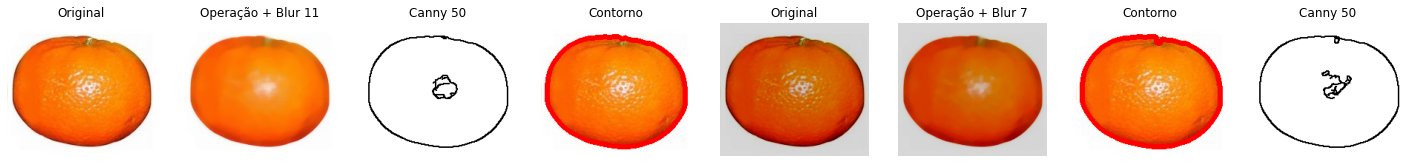

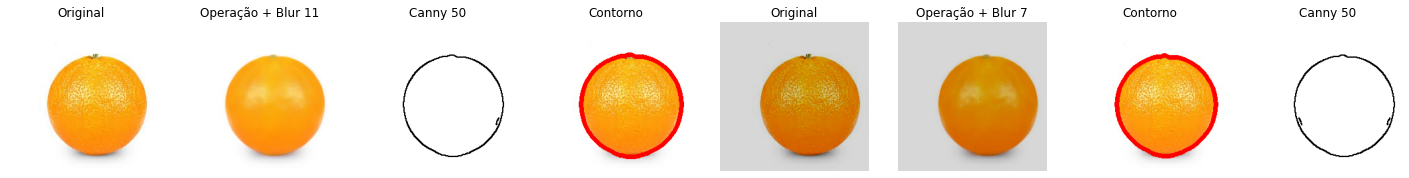

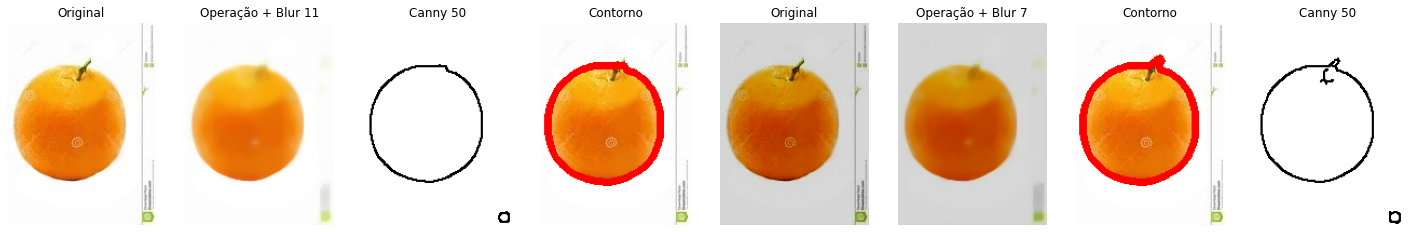

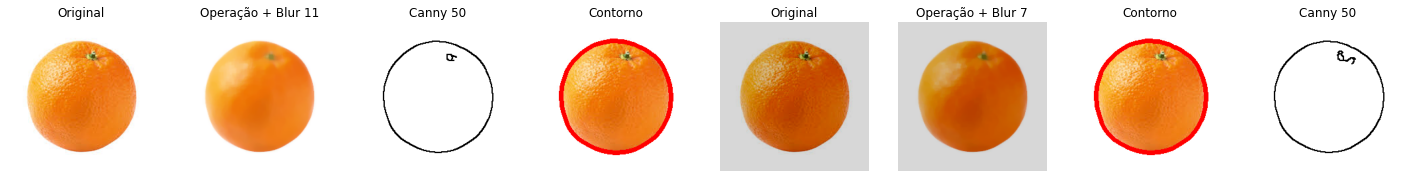

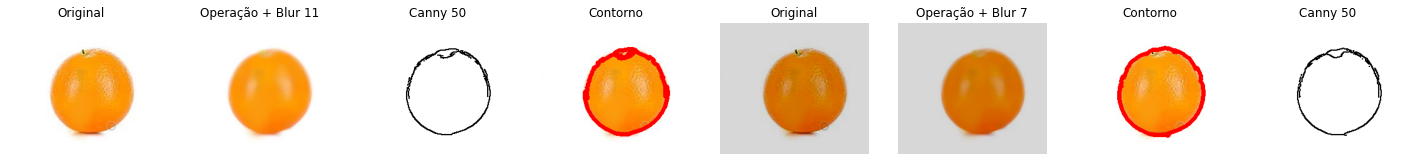

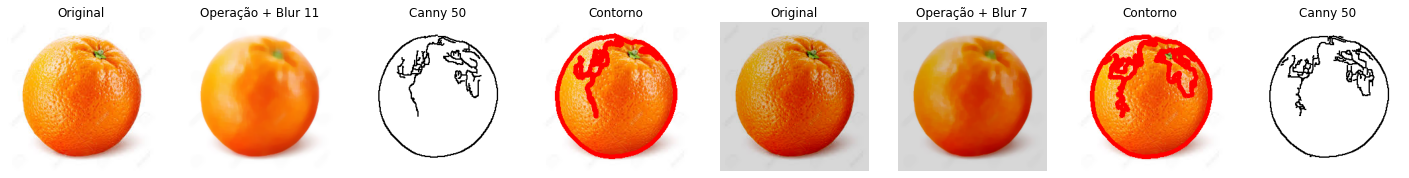

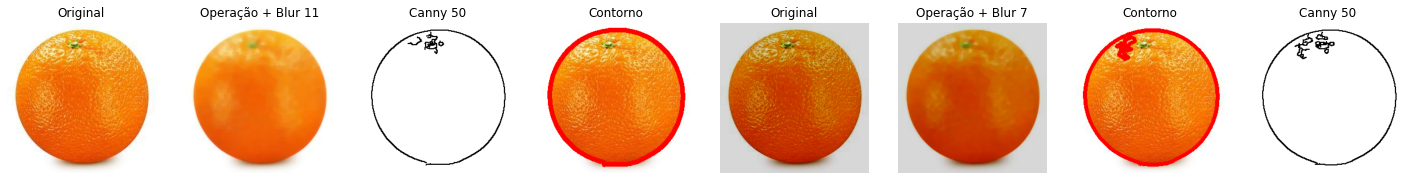

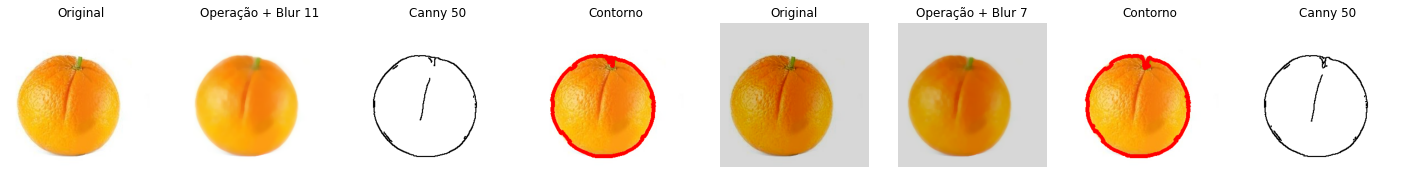

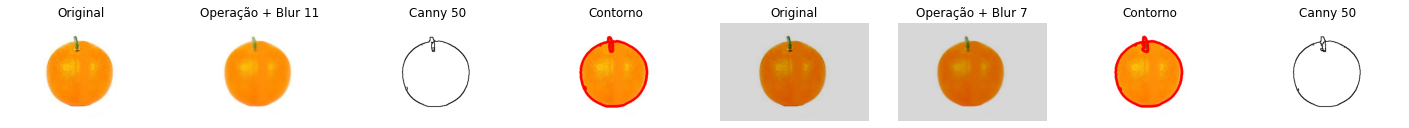

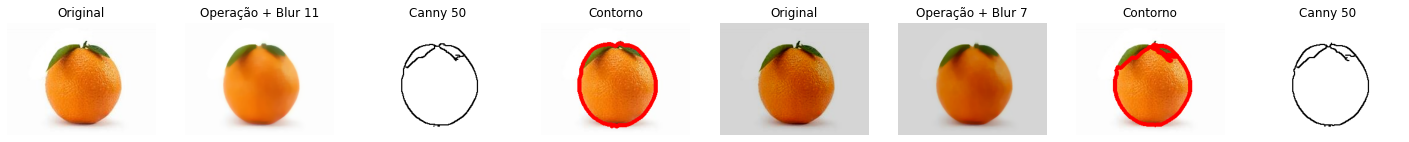

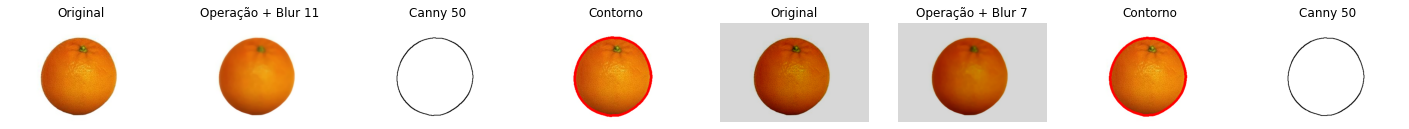

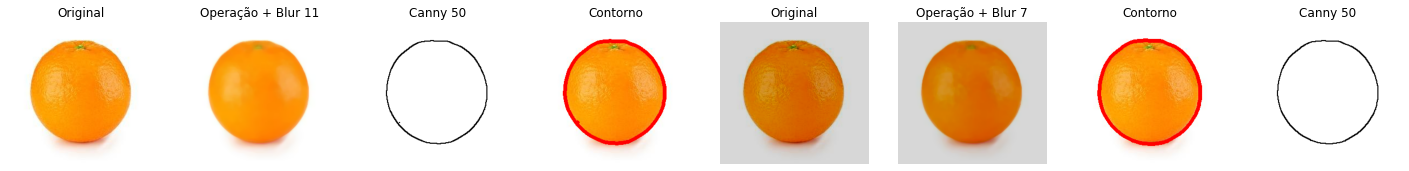

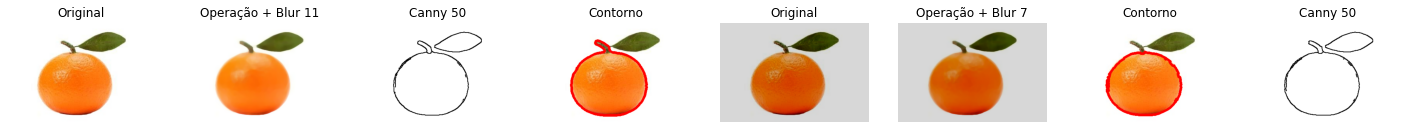

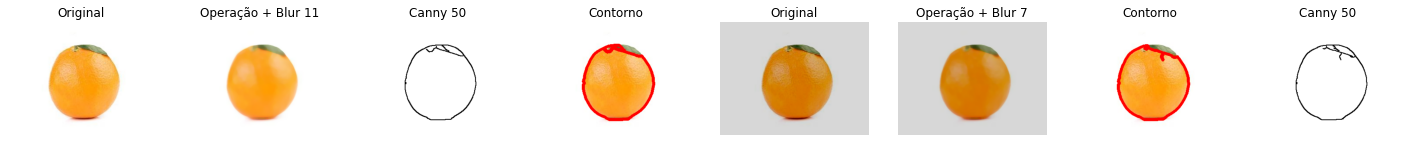

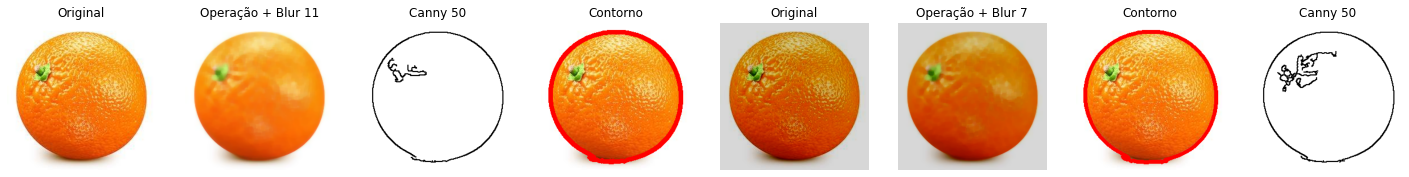

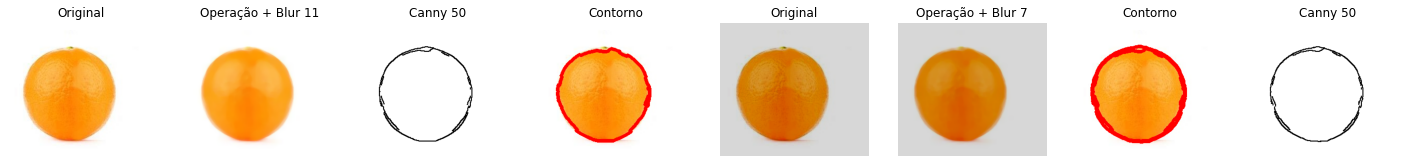

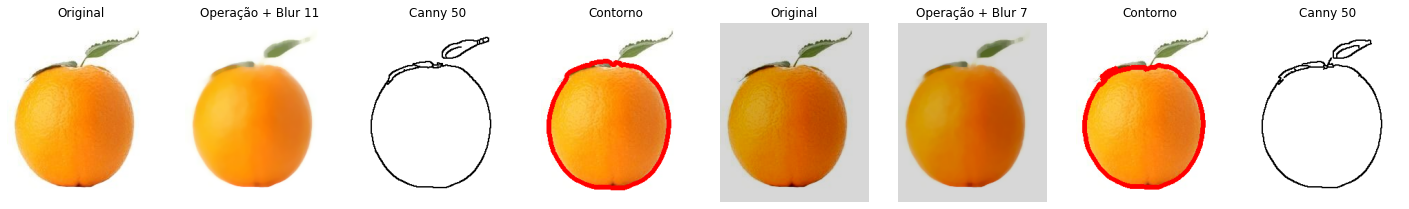

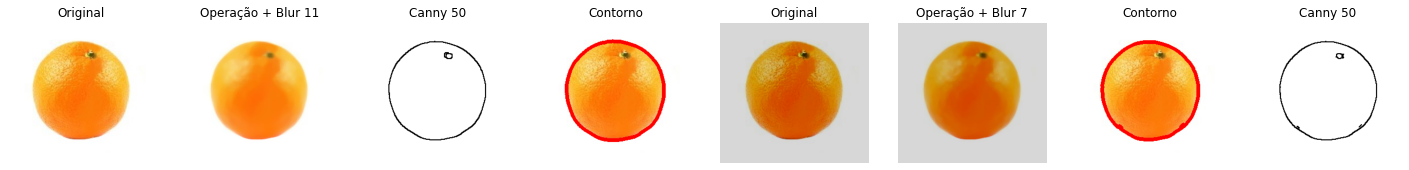

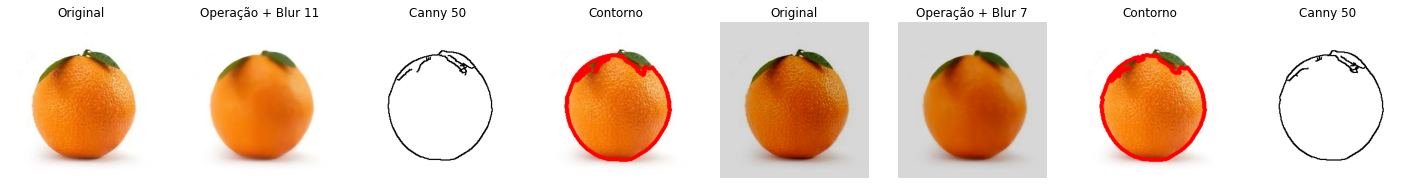

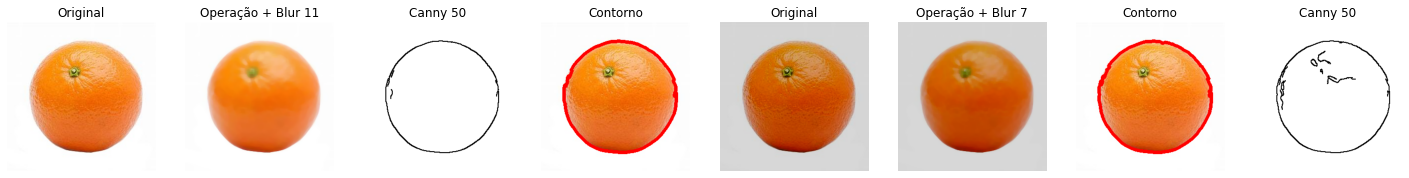

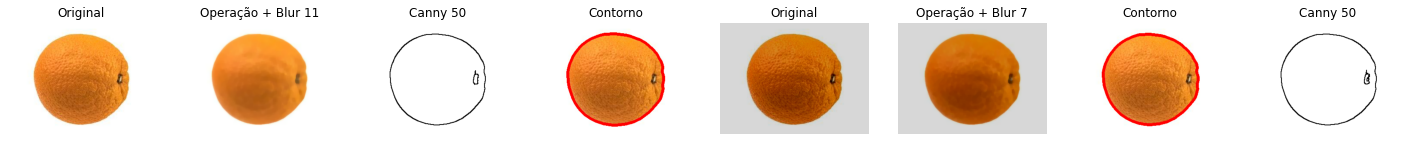

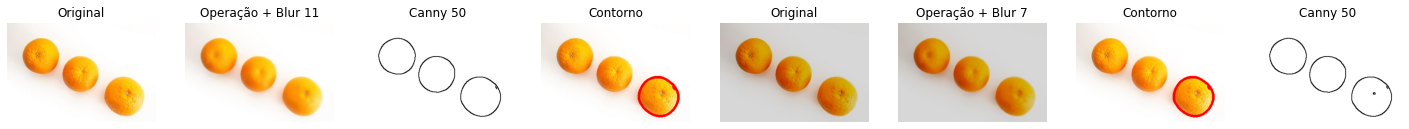

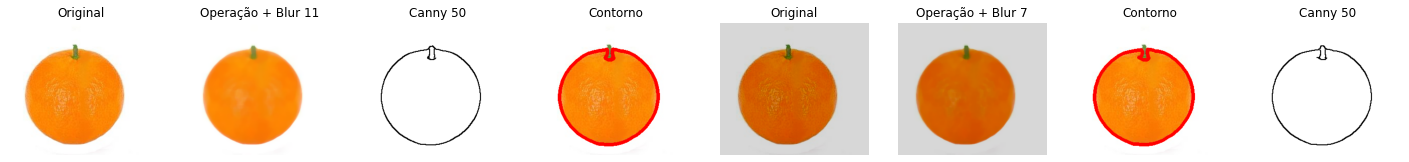

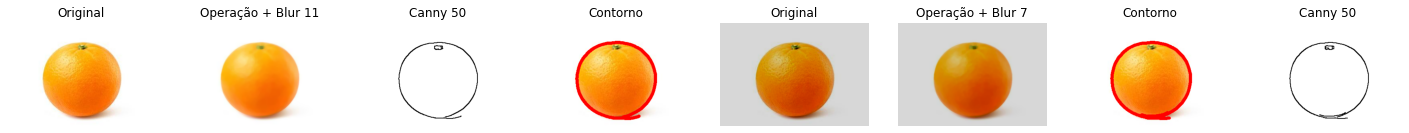

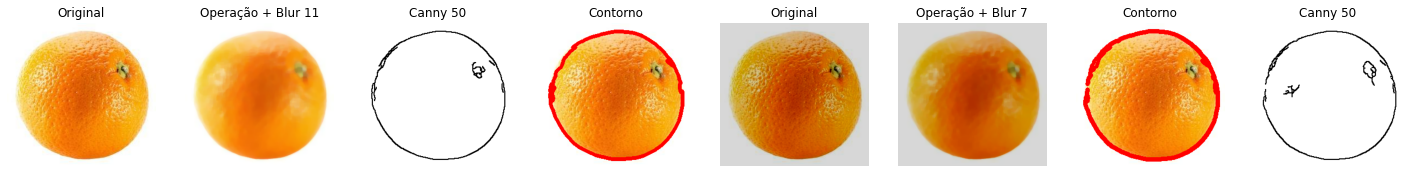

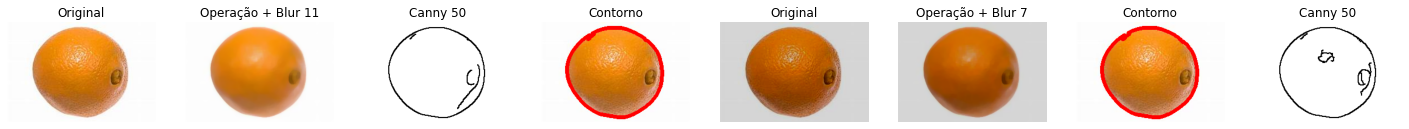

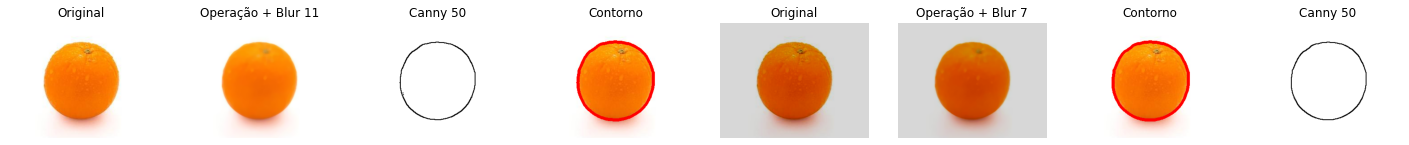

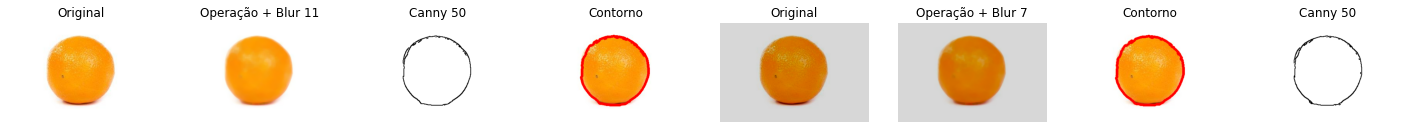

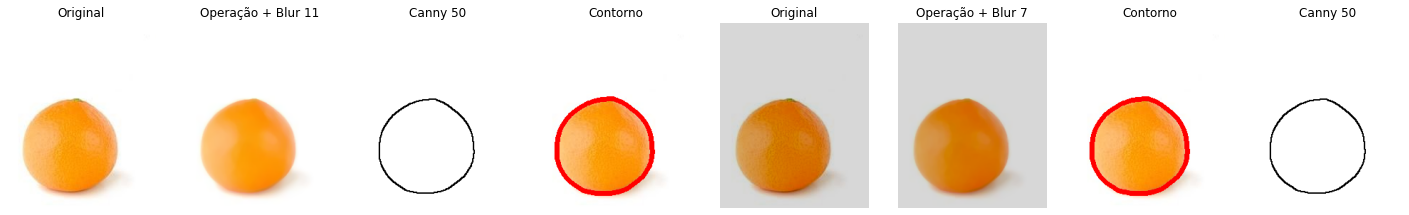

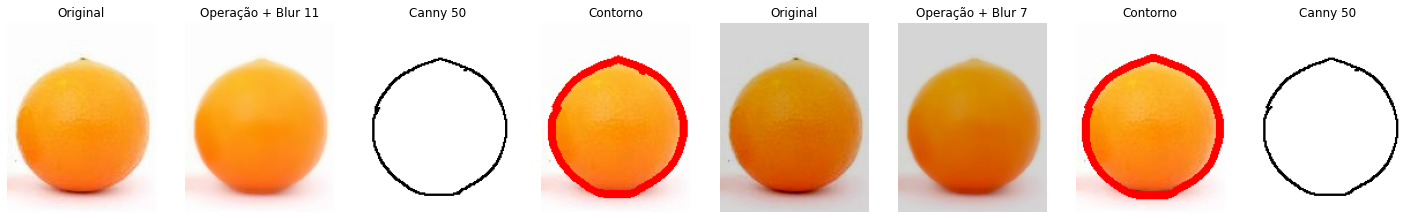

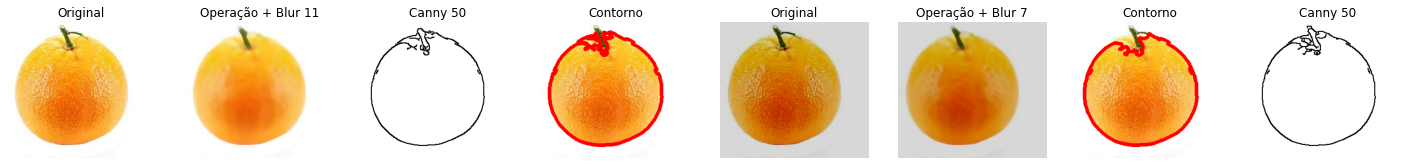

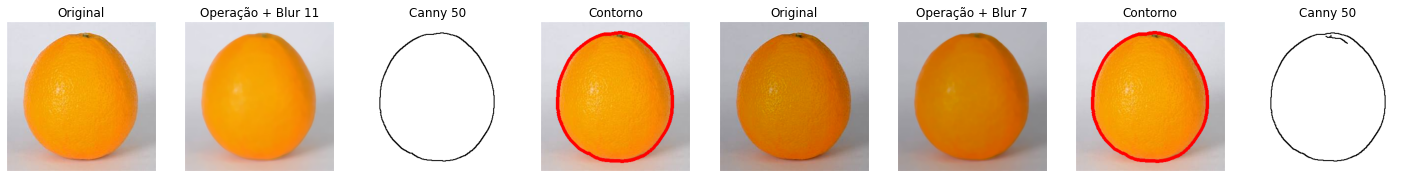

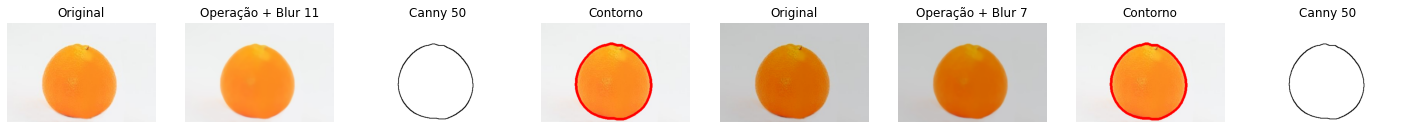

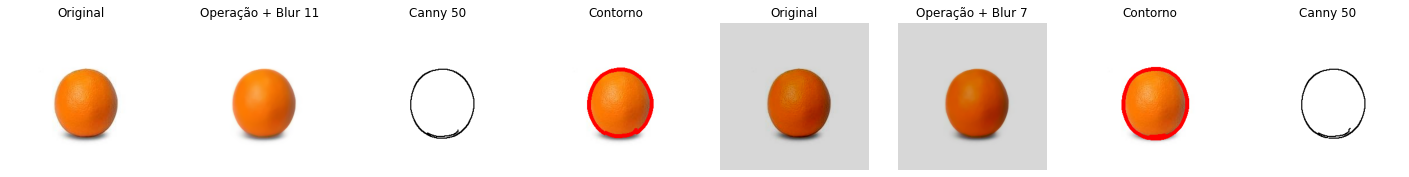

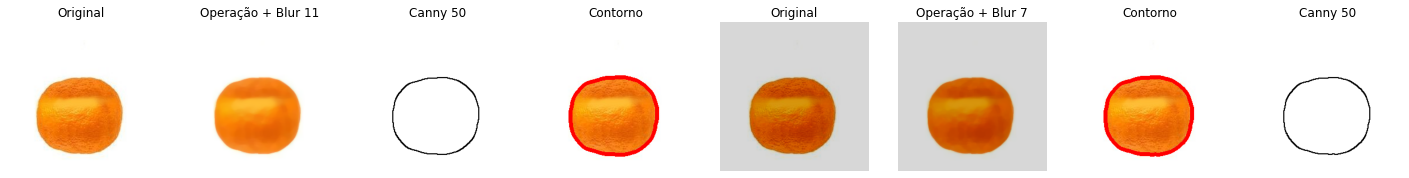

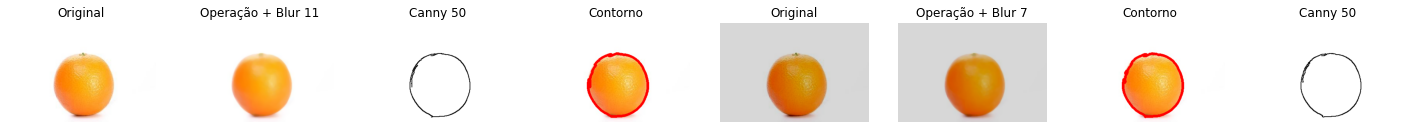

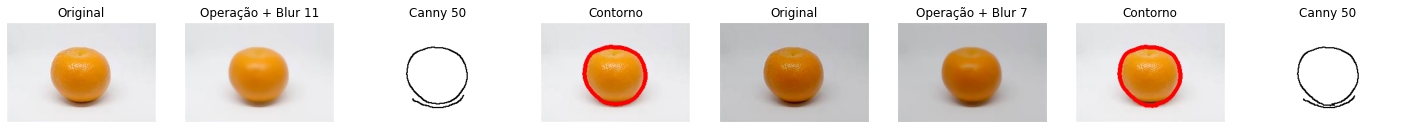

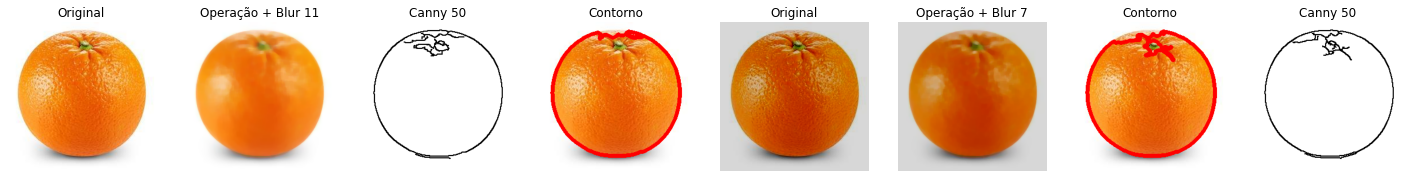

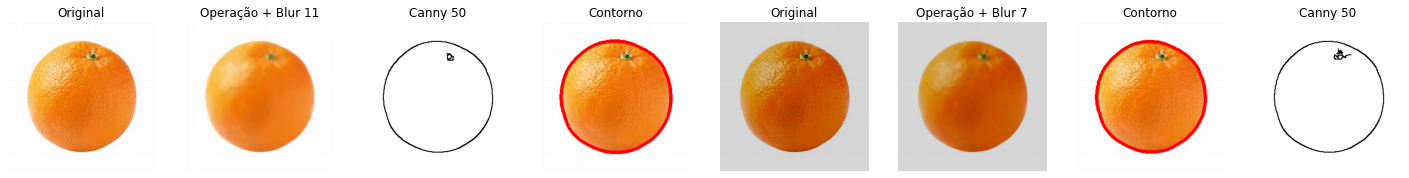

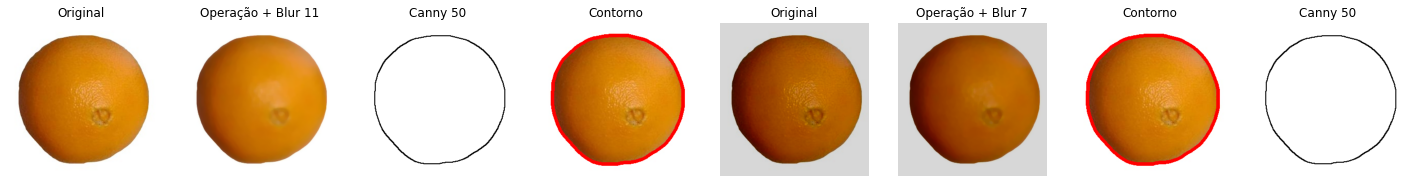

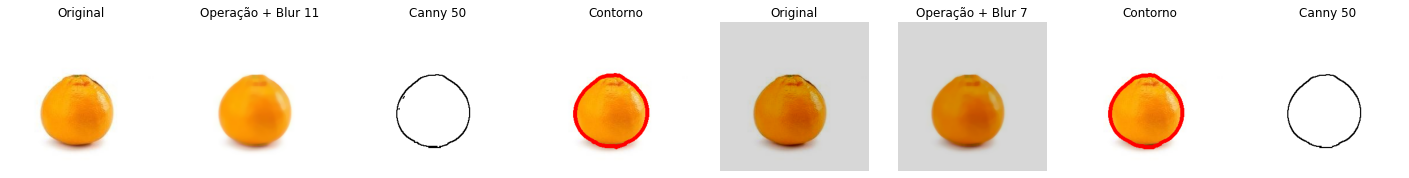

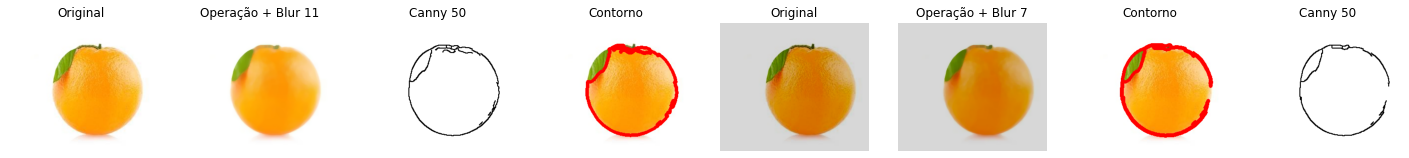

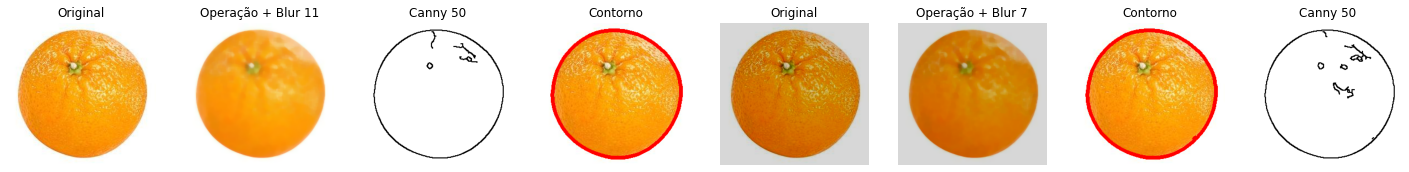

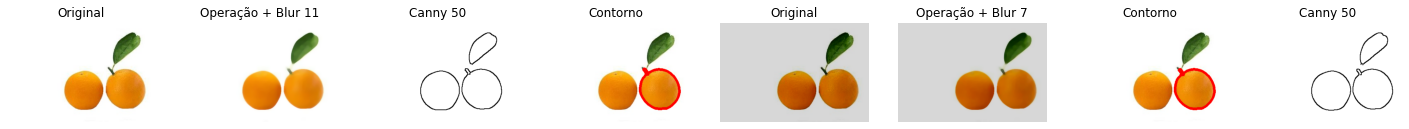

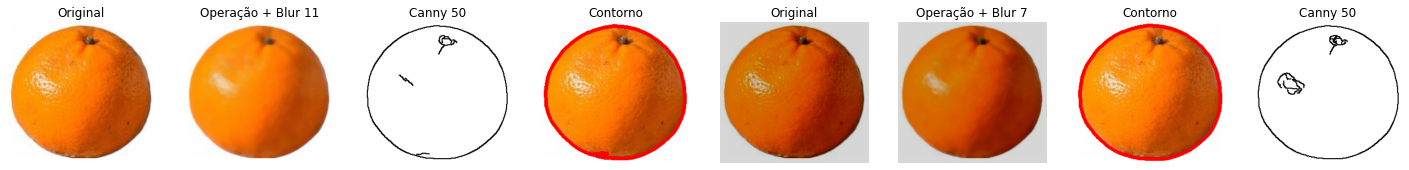

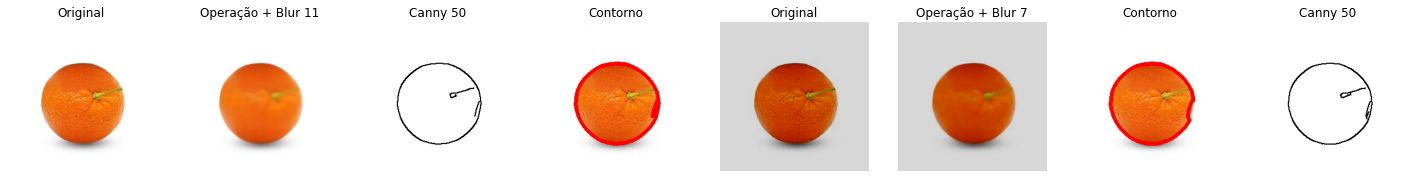

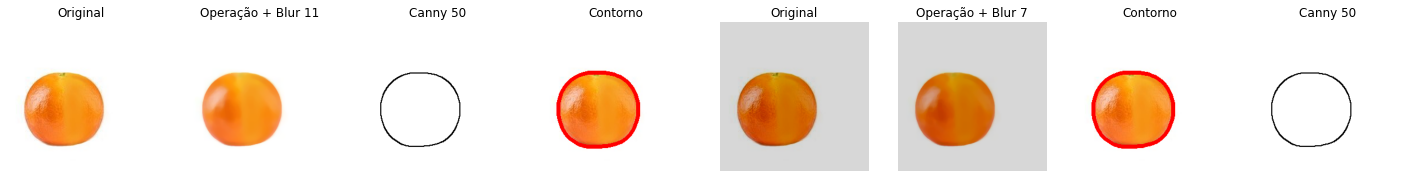

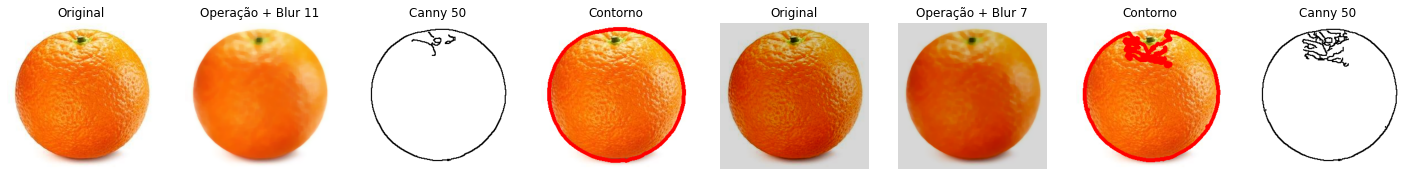

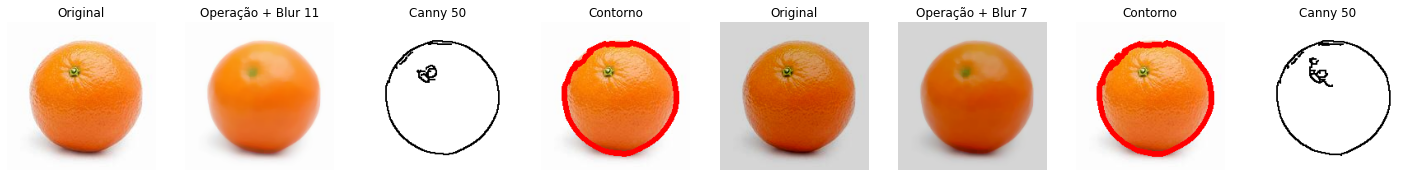

In [5]:
#PASSAR POR CADA IMAGEM

diretorio = "/content/drive/Othercomputers/Meu computador/Data_set_Frutas/dados/"

arquivos = os.listdir(diretorio) #Gerar uma lista aleatoria
arquivos.sort() #Ordenar a lista

#Função de tratamento de imagem-----------------------------------------------------
def imagem(nome_imagem, diretorio):
  img = cv.imread('/content/drive/Othercomputers/Meu computador/Data_set_Frutas/dados/' + diretorio + '/' + nome_imagem)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  imgcopy = cv.addWeighted(img, 0.50, img, 0.50, -40) #-40

  #Tratamento das imagens
  kernel = np.ones((5,5),np.uint8)
  kernel2 = np.ones((2,2),np.uint8) #2,2 ta gostosinho
  mask2 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

  img2 = cv.medianBlur(img, 9) # img2 = cv.medianBlur(img, 11)
  img2 = cv.morphologyEx(img2,cv.MORPH_CLOSE, kernel, iterations=1)

  img2copy = cv.medianBlur(imgcopy, 7) 
  img2copy = cv.morphologyEx(img2copy,cv.MORPH_CLOSE, kernel, iterations=1)

  #Tornar a imagem preto e branco para obter o contorno dela mais facil
  img7 = cv.Canny(img2, 50, 255)
  img7 = cv.dilate(img7,kernel2,iterations=1)
  
  img7copy = cv.Canny(img2copy, 50, 255)
  img7copy = cv.dilate(img7copy,kernel2,iterations=1)

  #Obter contorno da figura escura mudada

  contornos, ordem = cv.findContours(img7copy, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
  contorno = contornos[0]

  #Obter maior contorno escura mudada
  for i in range(0, len(contornos)):
      if len(contorno) < len(contornos[i]):
       contorno = contornos[i]

  imgcontorno = img.copy()
  cv.drawContours(imgcontorno, [contorno], -1, (255,0,0), 5)    
       

  #Obter contorno da figura original
  contornos2, ordem = cv.findContours(img7, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
  contorno2 = contornos2[0]     

  #Obter maior contorno figura original
  for i in range(0, len(contornos2)):
      if len(contorno2) < len(contornos2[i]):
       contorno2 = contornos2[i]
        
  imgcontorno2 = img.copy()
  cv.drawContours(imgcontorno2, [contorno2], -1, (255,0,0), 5)


  #Obter convexhull
  #for c in contornos:
  #  epsilon = 0.001 * cv.arcLength(c, True) #Acurácia da aproximação
  #  aprox = cv.approxPolyDP(c, epsilon, True)

  #imgcontorno = img.copy()
  #cv.drawContours(imgcontorno, [aprox], -1, (255,0,0), 5)            
        
  plt.figure(figsize=(25,25))
  plt.subplot(181), plt.imshow(img), plt.axis('off'), plt.title('Original')
  plt.subplot(182), plt.imshow(img2), plt.axis('off'), plt.title('Operação + Blur 11')
  plt.subplot(183), plt.imshow(img7, cmap='binary'), plt.axis('off'), plt.title('Canny 50')
  plt.subplot(184), plt.imshow(imgcontorno2), plt.axis('off'), plt.title('Contorno')
  plt.subplot(185), plt.imshow(imgcopy), plt.axis('off'), plt.title('Original')
  plt.subplot(186), plt.imshow(img2copy, cmap='gray'), plt.axis('off'), plt.title('Operação + Blur 7')
  plt.subplot(187), plt.imshow(imgcontorno), plt.axis('off'), plt.title('Contorno')
  plt.subplot(188), plt.imshow(img7copy, cmap='binary'), plt.axis('off'), plt.title('Canny 50')
  plt.show()

#Começo do codigo------------------------------------------------------------------------------------
#imagem('Apple_56.jpg', 'apple')
#Abrir o arquivo---------------------------------------------------
with open('/content/drive/Othercomputers/Meu computador/Data_set_Frutas/finformation.csv', 'w') as f:

  #Create the csv writer
  writer = csv.writer(f)
  writer2 = csv.DictWriter(f, fieldnames=['#','Classificacao']) #Titulos

  #Escrever cabeçalho
  writer2.writeheader()

  #Estrutura de repitição-----------------------------------------
  for arquivo in arquivos:

    #Rodar as pastas com cada imagem
    
    if arquivo == 'apple':
      arquivos = os.listdir(diretorio + 'apple')
      for arquivo in arquivos:
        writer.writerow([arquivo] + ['Maca'])
        #imagem(arquivo, 'apple')
         
    if arquivo == 'banana':
      arquivos = os.listdir(diretorio + 'banana')
      for arquivo in arquivos:
        writer.writerow([arquivo] + ['Banana'])
        #imagem(arquivo, 'banana')

    if arquivo == 'grapes':
      arquivos = os.listdir(diretorio + 'grapes')
      for arquivo in arquivos:
        writer.writerow([arquivo] + ['Uva'])
        #imagem(arquivo, 'grapes')

    if arquivo == 'lemon':
      arquivos = os.listdir(diretorio + 'lemon')
      for arquivo in arquivos:
        writer.writerow([arquivo] + ['Limao'])  
        #imagem(arquivo)

    if arquivo == 'mango':
      arquivos = os.listdir(diretorio + 'mango')
      for arquivo in arquivos:
        writer.writerow([arquivo] + ['Manga'])
        #imagem(arquivo)

    if arquivo == 'orange':
      arquivos = os.listdir(diretorio + 'orange')
      for arquivo in arquivos:
        writer.writerow([arquivo] + ['Laranja'])
        imagem(arquivo, 'orange')

    if arquivo == 'cashew':
      arquivos = os.listdir(diretorio + 'cashew')
      for arquivo in arquivos:
        writer.writerow([arquivo] + ['Caju']) 
        #imagem(arquivo, 'cashew')
    
    if arquivo == 'pear':
      arquivos = os.listdir(diretorio + 'pear')
      for arquivo in arquivos:
        writer.writerow([arquivo] + ['Pera'])
        #imagem(arquivo, 'pear')

    if arquivo == 'pineapple':
      arquivos = os.listdir(diretorio + 'pineapple')
      for arquivo in arquivos:
        writer.writerow([arquivo] + ['Abacaxi'])
        #imagem(arquivo, 'pineapple')   

    if arquivo == 'strawberry':
      arquivos = os.listdir(diretorio + 'strawberry')
      for arquivo in arquivos:
        writer.writerow([arquivo] + ['Morango'])
        #imagem(arquivo, 'strawberry') 

    if arquivo == 'tomato':
      arquivos = os.listdir(diretorio + 'tomato')
      for arquivo in arquivos:
        writer.writerow([arquivo] + ['Tomate'])
        #imagem(arquivo, 'tomato')

    if arquivo == 'watermelon':
      arquivos = os.listdir(diretorio + 'watermelon')
      for arquivo in arquivos:
        writer.writerow([arquivo] + ['Melancia'])
        #imagem(arquivo, 'watermelon')                             

  
